## MLops Zoomcamp Week1 Assignement

In [1]:
# importing libraries
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
jan_data_file=r"C:\Users\Alimat sadia\MLopsZoomcamp\week1\DATA\fhv_tripdata_2021-01.parquet"
feb_data_file=r"C:\Users\Alimat sadia\MLopsZoomcamp\week1\DATA\fhv_tripdata_2021-02.parquet"
jan_data=pd.read_parquet(jan_data_file,engine='auto')
feb_data=pd.read_parquet(feb_data_file,engine='auto')

In [3]:
jan_data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [4]:
# the average duration
jan_data['duration']=jan_data['dropOff_datetime']-jan_data['pickup_datetime']
jan_data.duration = jan_data.duration.apply(lambda td: td.total_seconds() / 60)

In [5]:
# missing values
jan_data.isnull().sum()/ ( jan_data.count() + jan_data.isnull().sum() )

dispatching_base_num      0.000000
pickup_datetime           0.000000
dropOff_datetime          0.000000
PUlocationID              0.830307
DOlocationID              0.140558
SR_Flag                   1.000000
Affiliated_base_number    0.000767
duration                  0.000000
dtype: float64

In [6]:
jan_data.isnull().sum()/len(jan_data)

dispatching_base_num      0.000000
pickup_datetime           0.000000
dropOff_datetime          0.000000
PUlocationID              0.830307
DOlocationID              0.140558
SR_Flag                   1.000000
Affiliated_base_number    0.000767
duration                  0.000000
dtype: float64

In [7]:
jan_data=jan_data.fillna("-1")

C:\Users\Alimat sadia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

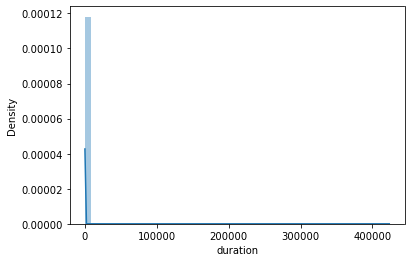

In [8]:
#duration distribution
sb.distplot(jan_data['duration'])

C:\Users\Alimat sadia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

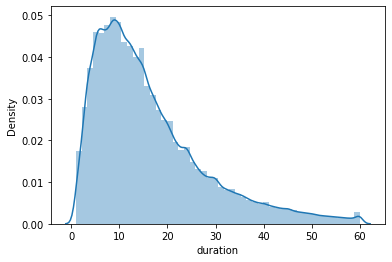

In [9]:
# keeping some data
jan_data = jan_data[(jan_data.duration >= 1) & (jan_data.duration <= 60)]
sb.distplot(jan_data['duration'])

In [10]:
jan_data.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [11]:
categorical = ['PUlocationID', 'DOlocationID']


jan_data[categorical]=jan_data[categorical].astype(str)

In [12]:
train_dicts = jan_data[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [13]:
train_dicts

[{'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1', 'DOlocationID': '71.0'},
 {'PUlocationID': '-1', 'DOlocationID': '91.0'},
 {'PUlocationID': '-1', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1', 'DOlocationID': '37.0'},
 {'PUlocationID': '-1', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1', 'DOlocationID': '89.0'},
 {'PUlocationID': '-1', 'DOlocationID': '177.0'},
 {'PUlocationID': '-1', 'DOlocationID': '225.0'},
 {'PUlocationID': '-1', 'DOlocationID': '63.0'},
 {'PUlocationID': '-1', 'DOlocationID': '67.0'},
 {'PUlocationID': '-1', 'DOlocationID': '22.0'},
 {'PUlocationID': '-1', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1', 'DOlocationID': '14.0'},
 {'PUlocationID': '-1', 'DOlocationID': '14.0'},
 {'PUlocationID': '-1'

In [14]:
target = 'duration'
y_train = jan_data[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

In [15]:
from math import sqrt
sqrt(mean_squared_error(y_train, y_pred, squared=False))

3.2447679589164817

C:\Users\Alimat sadia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alimat sadia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


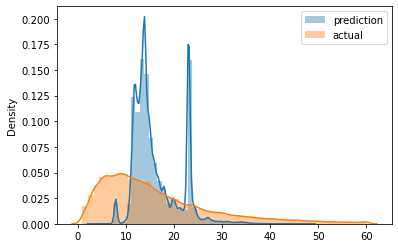

In [16]:
sb.distplot(y_pred, label='prediction')
sb.distplot(y_train, label='actual')

plt.legend()

In [17]:
feb_data.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')

### February Data preparation

In [18]:
feb_data['duration'] = feb_data['dropOff_datetime']-feb_data['pickup_datetime']
feb_data.duration = feb_data.duration.apply(lambda td: td.total_seconds() / 60)

In [19]:
feb_data.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               884691
DOlocationID               152352
SR_Flag                   1037692
Affiliated_base_number          0
duration                        0
dtype: int64

In [20]:
feb_data=feb_data.fillna("-1")

In [21]:
feb_data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,-1,-1,-1,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,-1,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,-1,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,-1,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1,225.0,-1,B00037,13.800000
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,-1,31.0,-1,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,-1,169.0,-1,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,-1,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,-1,B03285,18.050000


In [22]:

feb_data = feb_data[(feb_data.duration >= 1) & (feb_data.duration <= 60)]

categorical = ['PUlocationID', 'DOlocationID']
feb_data[categorical]

,PUlocationID,DOlocationID
1,173.0,82.0
2,173.0,56.0
3,82.0,129.0
4,-1,225.0
5,-1,61.0
...,...,...
1037687,-1,31.0
1037688,-1,169.0
1037689,28.0,171.0
1037690,16.0,252.0


In [23]:
len(feb_data)

990113

In [25]:
val_dicts = feb_data[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = feb_data[target].values
y_valpred = lr.predict(X_val)

mean_squared_error(y_val, y_valpred, squared=False)

11.828385279325994

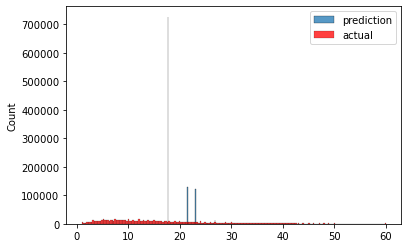

In [28]:
sb.histplot(y_valpred, label='prediction')
sb.histplot(y_val, label='actual',color='red')

plt.legend()